In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
## import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 12,7
sns.color_palette("hls", 10)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

In [4]:
df= pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape


(1338, 7)

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

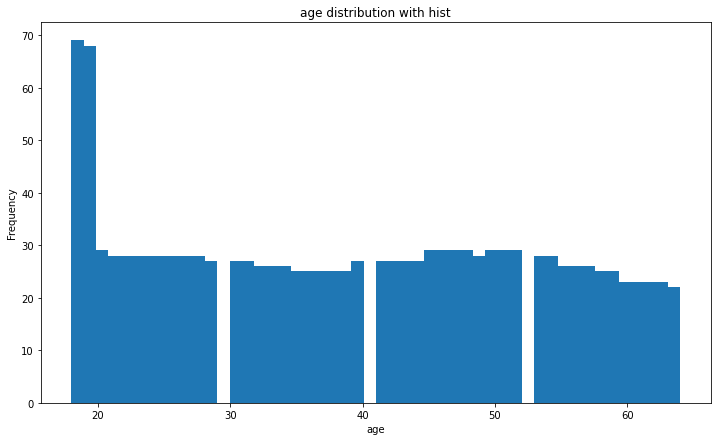

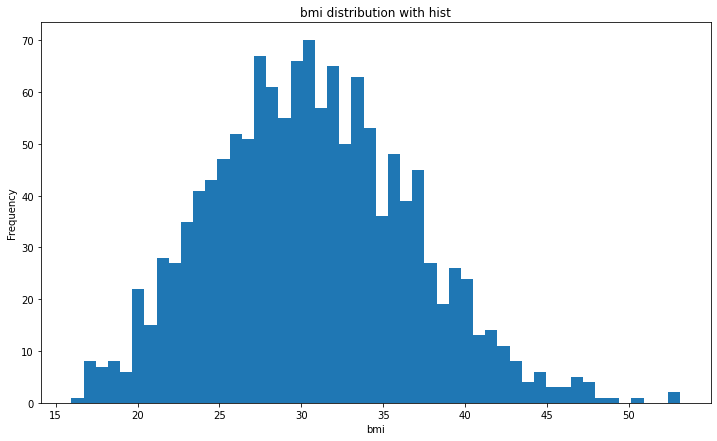

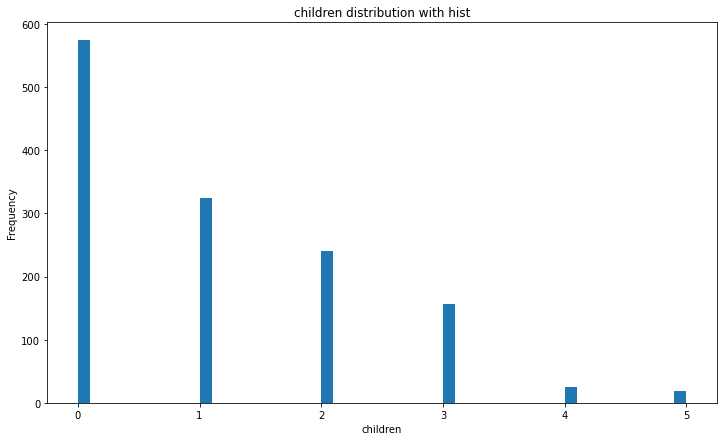

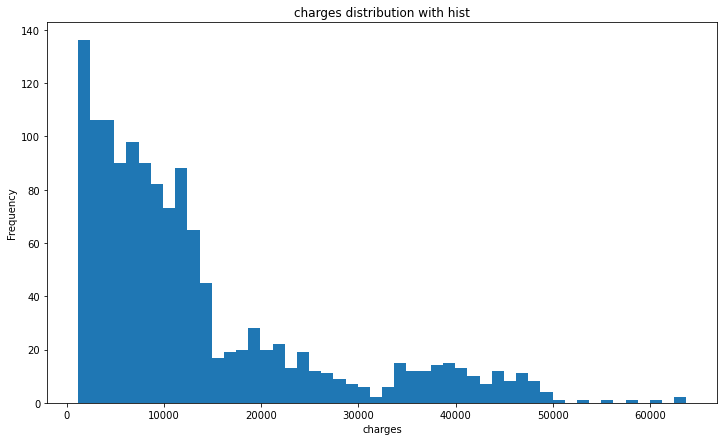

In [10]:
# plotting numerical features 

num_variable = (df.dtypes==float) | (df.dtypes=="int64")
num_variable = df.columns[num_variable].tolist()

def plot_hist(train_df, variable):
    plt.figure(figsize = (12,7))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    
for i in num_variable:
    plot_hist(df,i)

There are 2 unique sex


Count of sex


male      676
female    662
Name: sex, dtype: int64


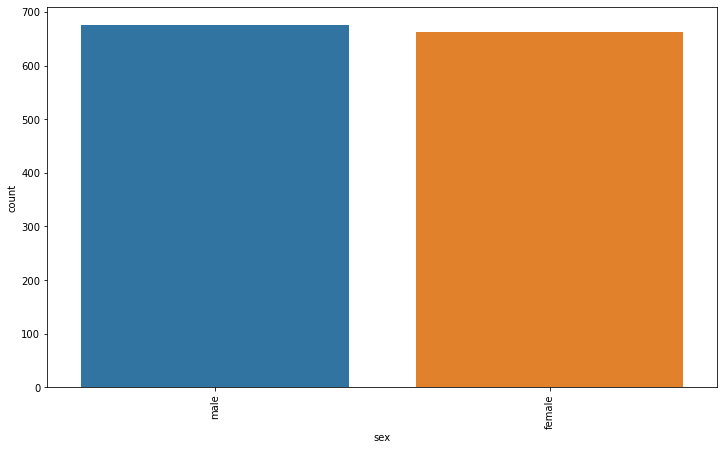



There are 2 unique smoker


Count of smoker


no     1064
yes     274
Name: smoker, dtype: int64


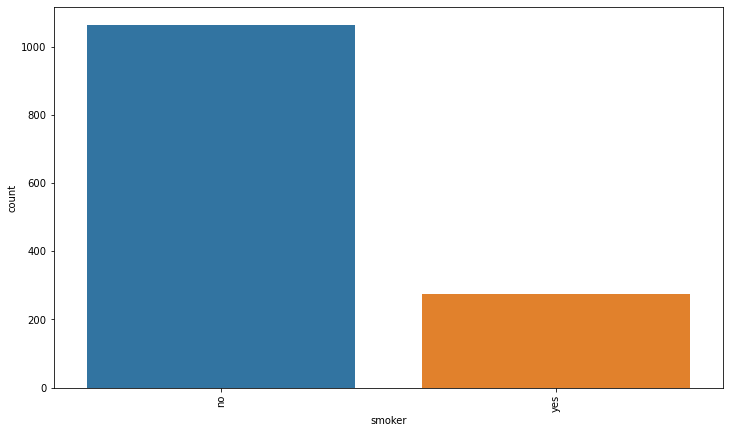



There are 4 unique region


Count of region


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


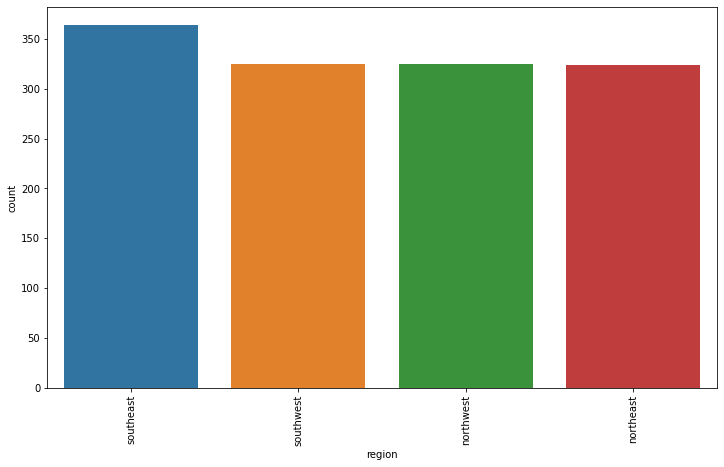

In [11]:
##plotting the categorical features

cat_variable = df.dtypes==object
cat_variable = df.columns[cat_variable].tolist()

# Count of products per keys
def bar_plot(data,feature):
    print(f'There are {len(set(data[feature]))} unique {feature}')
    print('\n')
    sns.countplot(x = feature,
              data = data,
              order = data[feature].value_counts(ascending=False)[0:20].index)
    plt.xticks(rotation=90)
    print(f'Count of {feature}')
    print('\n')
    print(data[feature].value_counts(ascending=False)[0:20])
    plt.show()
    print('\n')
    
for i in cat_variable:
    bar_plot(df,i)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

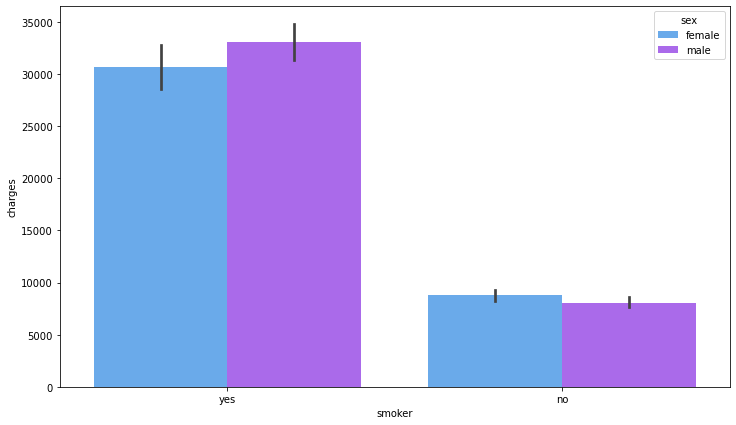

In [12]:
sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='cool')

<AxesSubplot:xlabel='children', ylabel='charges'>

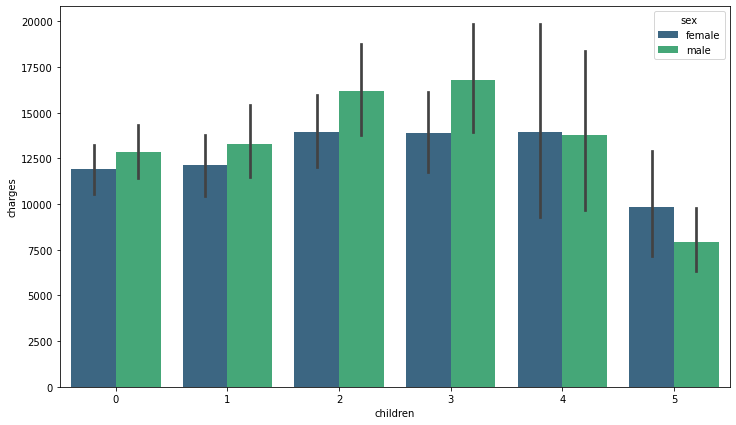

In [13]:
sns.barplot(x='children', y='charges', hue='sex', data=df, palette='viridis')

In [14]:
df.groupby("age")[["charges"]].mean().sort_values("charges", ascending = False)

,charges
age,
64,23275.530837
61,22024.457609
60,21979.418507
63,19884.998461
43,19267.278653
62,19163.856573
59,18895.869532
54,18758.546475
52,18256.269719


In [15]:
# creating new feature by using age column

df["age_range"] = 1000
for i in range(len(df["age"])):
    if df["age"][i]<30:
        df["age_range"][i] = 1
    elif df["age"][i] >=30 and df["age"][i]<45:
        df["age_range"][i] = 2
    elif df["age"][i] >=45:
        df["age_range"][i] = 3

C:\Users\Shelley\AppData\Local\Temp/ipykernel_37872/278380050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age_range"][i] = 1
C:\Users\Shelley\AppData\Local\Temp/ipykernel_37872/278380050.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age_range"][i] = 2
C:\Users\Shelley\AppData\Local\Temp/ipykernel_37872/278380050.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age_range"][i] = 3


In [16]:
df

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,3
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,1


In [17]:
df.groupby("age_range")[["charges"]].mean()

,charges
age_range,
1,9182.487125
2,12490.912530
3,17070.491773


<AxesSubplot:xlabel='age_range', ylabel='charges'>

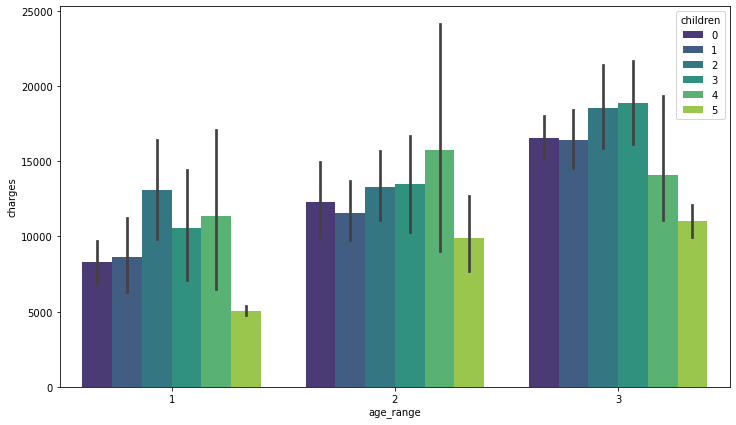

In [18]:
sns.barplot(x='age_range', y='charges', hue='children', data=df, palette='viridis')

<AxesSubplot:xlabel='region', ylabel='charges'>

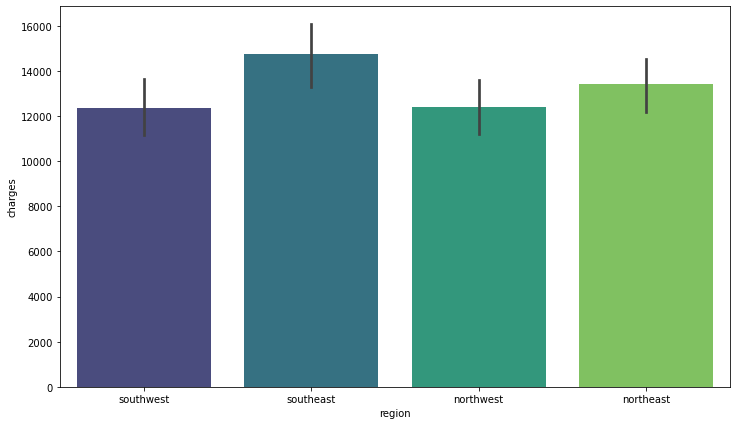

In [19]:
sns.barplot(x='region', y='charges', data=df, palette='viridis')

<AxesSubplot:xlabel='region', ylabel='charges'>

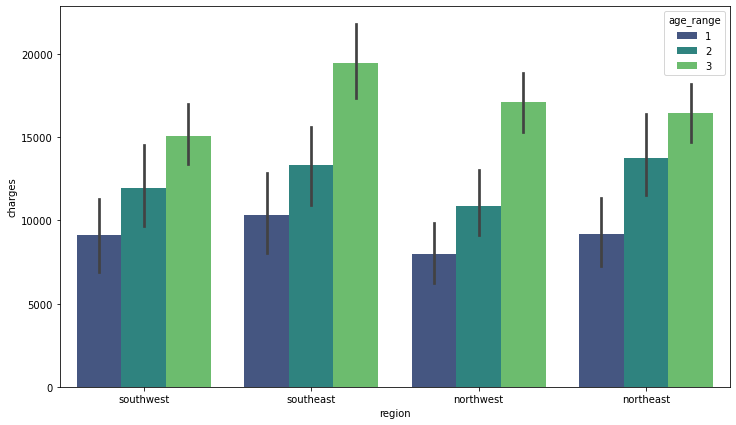

In [20]:
sns.barplot(x='region', y='charges', data=df, hue= "age_range" , palette='viridis')

In [21]:
df["have_children"] = ["No" if i == 0 else "Yes" for i in df["children"]]

In [22]:
df


,age,sex,bmi,children,smoker,region,charges,age_range,have_children
0,19,female,27.900,0,yes,southwest,16884.92400,1,No
1,18,male,33.770,1,no,southeast,1725.55230,1,Yes
2,28,male,33.000,3,no,southeast,4449.46200,1,Yes
3,33,male,22.705,0,no,northwest,21984.47061,2,No
4,32,male,28.880,0,no,northwest,3866.85520,2,No
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,3,Yes
1334,18,female,31.920,0,no,northeast,2205.98080,1,No
1335,18,female,36.850,0,no,southeast,1629.83350,1,No
1336,21,female,25.800,0,no,southwest,2007.94500,1,No


<AxesSubplot:xlabel='have_children', ylabel='charges'>

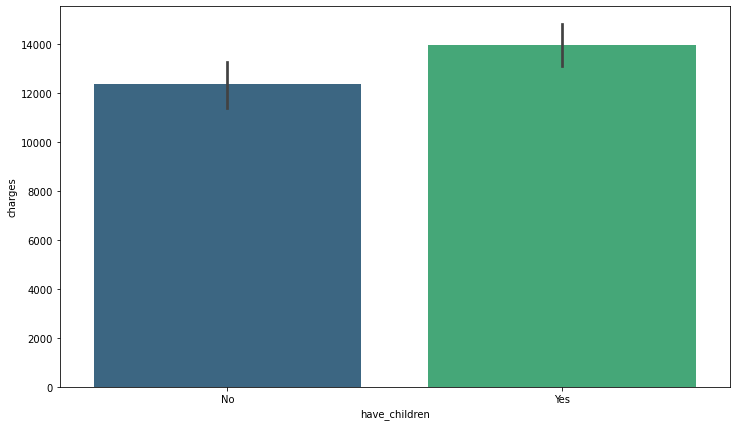

In [23]:
sns.barplot(x='have_children', y='charges', data=df , palette='viridis')

In [24]:
cat_variable.append("have_children") #Converting categorical variables to numeric variables

In [25]:
cat_variable

['sex', 'smoker', 'region', 'have_children']

In [26]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df[cat_variable] = df[cat_variable].apply(lambda col: lb.fit_transform(col.astype(str)))

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,have_children
0,19,0,27.900,0,1,3,16884.92400,1,0
1,18,1,33.770,1,0,2,1725.55230,1,1
2,28,1,33.000,3,0,2,4449.46200,1,1
3,33,1,22.705,0,0,1,21984.47061,2,0
4,32,1,28.880,0,0,1,3866.85520,2,0


<AxesSubplot:>

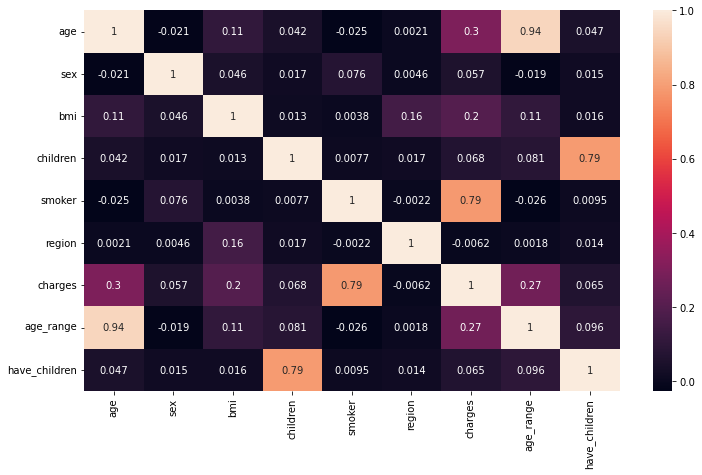

In [28]:
sns.heatmap(df.corr(),annot=True) #looking at correlation values

In [29]:
X = df.drop(columns=["charges","region"])
y = df["charges"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:

def models():
    #use linear regression
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    #use Kneighbors
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor()
    knn.fit(X_train,y_train)

    #use Support vector classifier (linear kernel)
    from sklearn.svm import SVR
    svc = SVR(kernel='linear')
    svc.fit(X_train,y_train)

    #use decision tree
    from sklearn.tree import DecisionTreeRegressor
    tree=DecisionTreeRegressor()
    tree.fit(X_train,y_train)

    #use Random Forest
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(X_train,y_train)

   
    #Print the accuracy for ech model
    print("Results")
    print('[0] Linear Regression Test Error and score: ',np.sqrt(mean_squared_error(y_test,lr.predict(X_test))),lr.score(X_test, y_test))
    print('[1] K neighbors Regression Test Error and score: ',np.sqrt(mean_squared_error(y_test,knn.predict(X_test))),knn.score(X_test, y_test))
    print('[2] SVR linear Regression Test Error and score: ',np.sqrt(mean_squared_error(y_test,svc.predict(X_test))),svc.score(X_test, y_test))
    print('[3] Decision Tree Regression Test Error and score: ',np.sqrt(mean_squared_error(y_test,tree.predict(X_test))),tree.score(X_test, y_test))
    print('[4] Random Forest Regression Test Error and score: ',np.sqrt(mean_squared_error(y_test,forest.predict(X_test))),forest.score(X_test, y_test))
    
    return lr,knn,svc,tree,forest

In [32]:
lr,knn,svc,tree,forest = models()

Results
[0] Linear Regression Test Error and score:  5980.474342031118 0.7696490587477275
[1] K neighbors Regression Test Error and score:  11893.472092622707 0.08896293998858584
[2] SVR linear Regression Test Error and score:  13402.698689698083 -0.15691975416097592
[3] Decision Tree Regression Test Error and score:  6587.295135569004 0.7205314304263684
[4] Random Forest Regression Test Error and score:  4719.320463261571 0.8565575593510479


In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
gb = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 3, n_estimators= 500, subsample= 0.5)

gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, subsample=0.5)

In [35]:
y_pred = gb.predict(X_test)
print('GradientBoostRegressor error', np.sqrt(mean_squared_error(y_test, y_pred)))

GradientBoostRegressor error 3999.7075807872916


In [36]:
#create the mape function to evaluate the results
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
mape(y_test,y_pred)

30.640757457534672

In [38]:
result = pd.concat([pd.DataFrame(y_test).reset_index(), pd.DataFrame(y_pred,columns=["prediction"])],axis=1)
del result["index"]
result

,charges,prediction
0,6311.95200,7696.591150
1,1743.21400,3151.878969
2,39836.51900,39808.189098
3,19199.94400,19693.080421
4,11946.62590,12973.614989
...,...,...
263,6640.54485,6784.666553
264,18033.96790,18596.376872
265,42856.83800,42262.174796
266,8978.18510,11296.932662


In [39]:
Importance = pd.DataFrame({"Importance": gb.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'variable severity levels')

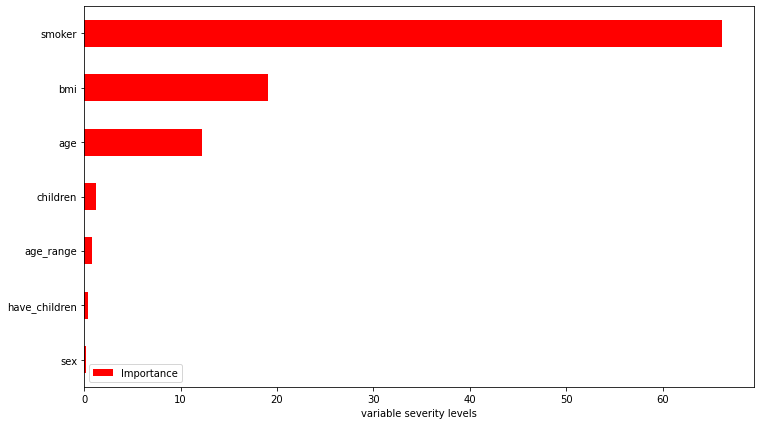

In [40]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("variable severity levels")

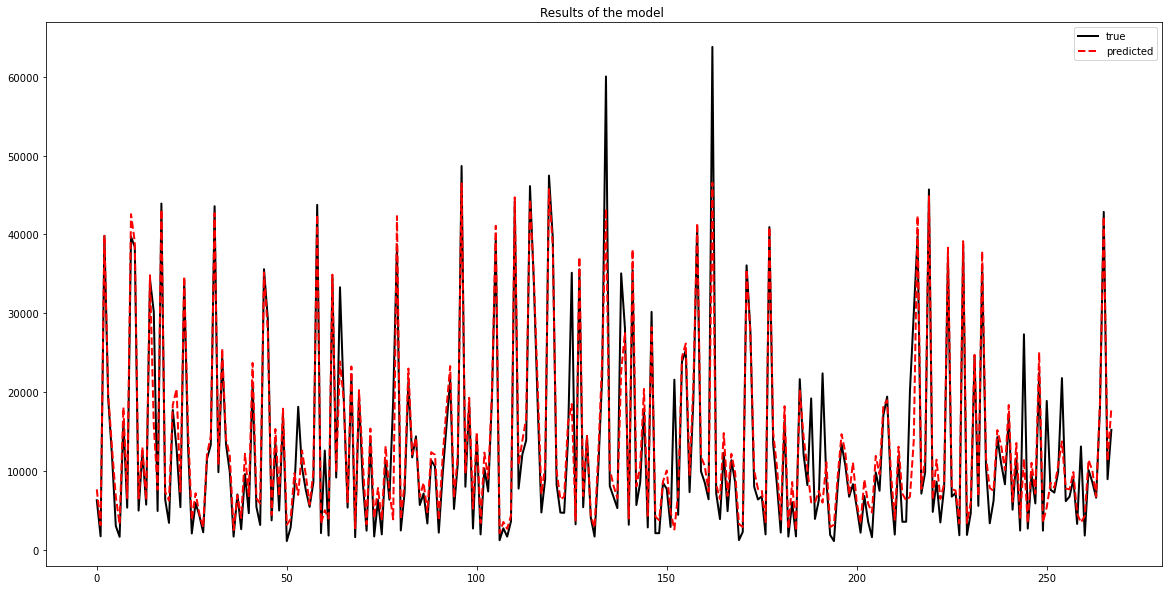

In [41]:
plt.figure(figsize=(20,10))
plt.plot(result["charges"], "black", linewidth=2)
plt.plot(result["prediction"], "r--", linewidth = 2)
plt.legend(["true","predicted"])
plt.title("Results of the model ")
plt.show()


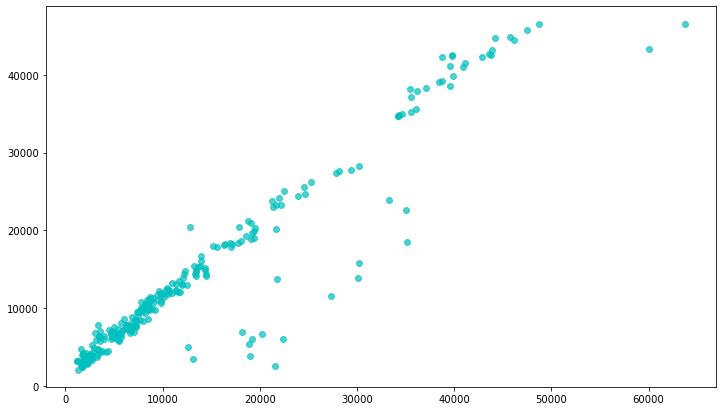

In [42]:
plt.scatter(x=y_test,y=y_pred,c = 'c', marker = 'o', s = 35, alpha = 0.7)